#  Pruebas con IBM Quantum Platform Classic.

![Imagen introduccion](assets/ibm_logo.png
)

---

#### Criptografía y comunicaciones seguras. Ciberseguridad. Programación cuántica.

---

#### **Autor:** *Héctor Ayuso Martín*

# Dos personas muy entrelazadas. Más que Einstein, Podolsky y Rosen. ##

![Imagen introduccion](assets/epr_love.webp)

> Lo primero: ¿Qué es esto? ¿De qué trata el funcionamiento de un cuadernillo Jupyter Notebook como este? Este cuaderno Jupyter Notebook es una herramienta interactiva que combina código, texto y visualizaciones para facilitar el aprendizaje y la experimentación. Aquí puedes ejecutar fragmentos de código, en este caso en Python, ver resultados en tiempo real y leer explicaciones detalladas, lo que lo hace perfecto para explorar conceptos de manera práctica.


## Introducción:

Sergio y Alma estuvieron juntos en algún momento de su vida y compartieron entre ellos un par EPR (aparte de otras cosas, supongo).

Compartieron un estado de entrelazamiento cuántico, pero, por circunstancias de la vida, ahora están separados. Cada uno conserva su qubit de ese par EPR, que sigue entrelazado a pesar de la distancia.

Sin esperárselo nadie, Sergio está en peligro al atragantarse con un bocadillo de Carpanta, y para resolver esa situación, Alma tiene que enviarle el estado de un qubit.

¿Cómo puede enviarle el estado de un qubit? ¿Qué tiene que enviar? Alma tiene que transmitir dos números complejos, 
𝛼
0
α 
0
​
  y 
𝛼
1
α 
1
​
 , pero solo dispone de un canal clásico para comunicarse con Sergio.

Si intentara enviar estos números por un canal clásico utilizando bits clásicos, ¿cuántos bits ocuparía un número complejo? Muchos. Además, Alma no sabe cuál es el estado del qubit. Ella tiene el qubit en superposición 
∣
+
⟩
∣+⟩, pero no conoce su estado exacto. Si intentara observarlo, el estado colapsaría en uno de sus estados base, 
∣
0
⟩
∣0⟩ o 
∣
1
⟩
∣1⟩, perdiendo la información original.

La pregunta aquí es: ¿cómo puede Alma enviar este estado a Sergio? ¿Puede hacerlo usando únicamente un canal clásico? ¿Hay esperanza para Sergio Carnero?

Usando teleportación cuántica, veremos que Alma puede salvar a Sergio utilizando únicamente dos bits de información, y sí, transmitidos a través de un canal clásico.

Estado original a teletransportar:
  α₀ = 0.8319   α₁ = 0.5286-0.1691j
  (θ = 1.1767, φ = 5.9735)

Circuito cuántico:


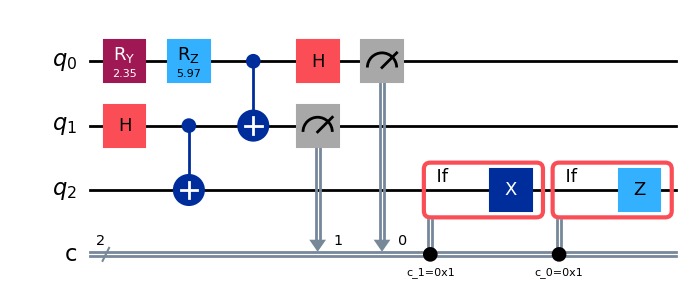

In [ ]:
#Teleportación Cuántica: Alma salva a Sergio del bocadillo en mal estado de jijas en Carpanta!


from qiskit import QuantumCircuit, transpile, ClassicalRegister
from qiskit_aer import AerSimulator
import numpy as np


    # Para reproducibilidad

np.random.seed(42) #--> configuramos la semilla.

def crear_estado_aleatorio():
    
    """
    Crea un estado cuántico aleatorio |ψ⟩ = α|0⟩ + β|1⟩
    con coeficientes definidos por los ángulos θ y φ.
    
    Retorna:
    
      alpha, beta, theta y phi
    """
    
    theta = np.random.uniform(0, np.pi) #los coeficientes se crean de forma pseudo-aleatoria
    
    phi = np.random.uniform(0, 2*np.pi) #""
    
    alpha = np.cos(theta/2) #""
    
    beta = np.exp(1j*phi) * np.sin(theta/2) #""
    
    return alpha, beta, theta, phi



    #Creamos el circuito con 3 qubits.

circuito = QuantumCircuit(3)



    # Agregamos un único registro clásico con 2 bits
    
creg = ClassicalRegister(2, 'c')

circuito.add_register(creg)



    #Preparacion del estado a teletransportar..

alpha, beta, theta, phi = crear_estado_aleatorio()

print(f"Estado original a teletransportar:\n  α₀ = {alpha:.4f}   α₁ = {beta:.4f}")

print(f"  (θ = {theta:.4f}, φ = {phi:.4f})")

circuito.ry(2 * theta, 0) 

circuito.rz(phi, 0)



    #Creaando el par EPR entre qubits 1 y 2

"""
Los qubits 1 y 2 deben de encontrarse en un estado de entrelazamiento, para ello utilizamos
una puerta Hadamard y una puerta Control Not.
"""

circuito.h(1)

circuito.cx(1, 2)



    #Medición en los qubits de Alma

circuito.cx(0, 1)

circuito.h(0)

circuito.measure(0, 0)  # Medimos el qubit 0 y almacenamos en el registro clásico[0]

circuito.measure(1, 1)  # Medimos el qubit 1 y almacenamos en el registro clásico[1]


# Paso 4: Corrección en el qubit de Sergio Carnero

with circuito.if_test((creg[1], 1)):  # Si el segundo bit es 1, aplica X
    
    circuito.x(2)

with circuito.if_test((creg[0], 1)):  # Si el primer bit es 1, aplica Z
    
    circuito.z(2)
    


print("\nCircuito cuántico:")

circuito.draw(output='mpl')






In [19]:
# Paso 5: Simulación del circuito con AerSimulator

simulador = AerSimulator()
circuito_transpilado = transpile(circuito, simulador)
resultado = simulador.run(circuito_transpilado, shots=1024).result()
cuentas = resultado.get_counts()


print("\nResultados de la medición:")
print(cuentas)

print("\nConclusión: ¡Sergio Carnero se salva de la indigestión")


Resultados de la medición:
{'10': 239, '11': 268, '00': 264, '01': 253}

Conclusión: ¡Sergio Carnero se salva de la indigestión


---

El objetivo de este experimento es demostrar el protocolo de teleportación cuántica, un fenómeno fundamental en la computación cuántica y en la teoría de la información cuántica. La teleportación cuántica permite transferir el estado de un qubit a otro qubit distante sin mover físicamente la partícula, usando solo entrelazamiento cuántico y comunicación clásica.

Lo que hemos conseguido con este experimento es tomar un estado cuántico aleatorio, que representa una superposición de los estados |0⟩ y |1⟩, y transferirlo con éxito desde un qubit inicial (qubit 0) hasta un qubit de destino (qubit 2), sin que exista un canal físico que transporte dicho estado directamente. Esto es posible gracias a la propiedad del entrelazamiento cuántico y a un conjunto de operaciones cuánticas y clásicas que permiten reconstruir el estado en el qubit de destino.

Para lograr esta teleportación, hemos seguido el protocolo estándar de teleportación cuántica, que consta de varios pasos fundamentales.

Primero, preparamos un estado cuántico aleatorio que queremos teletransportar. Este estado se describe mediante dos números complejos α y β, que representan las amplitudes de probabilidad de los estados |0⟩ y |1⟩. En términos generales, cualquier estado de un qubit puede representarse como:



$$
|\psi\rangle = \alpha |0\rangle + \beta |1\rangle
$$



Para crear este estado de manera aleatoria, se generan dos ángulos, θ y φ, donde θ controla la probabilidad de estar en el estado |0⟩ o |1⟩, y φ introduce una fase relativa entre los dos estados. Con estos ángulos, el estado cuántico se prepara aplicando una rotación en el eje Y y luego una rotación en el eje Z al qubit 0.

Después, se establece un par de qubits entrelazados entre los qubits 1 y 2. Para ello, aplicamos ua puerta Hadamard (H) en el qubit 1 para crear una superposición, seguida de una puerta CNOT con el qubit 1 como control y el qubit 2 como objetivo. Esto genera un estado entrelazado de la forma:




$$
\frac{|00\rangle + |11\rangle}{\sqrt{2}}
$$



En este punto, el qubit 0 (que contiene el estado que queremos teletransportar) aún no está involucrado con el entrelazamiento. Para integrarlo en el sistema, aplicamos una puerta CNOT entre el qubit 0 y el qubit 1, lo que mezcla el estado original con el sistema entrelazado. Luego, aplicamos una puerta Hadamard al qubit 0, lo que efectivamente redistribuye la información cuántica entre los tres qubits y prepara el sistema para la medición.

En la siguiente fase del experimento, realizamos mediciones en los qubits 0 y 1. Al medir estos qubits, obtenemos dos bits de información clásica, que corresponden a un número entre 00, 01, 10 o 11. Estos dos bits son enviados al receptor mediante un canal de comunicación clásica. En un sistema real, esto equivaldría a que el emisor comunica sus resultados al receptor a través de un mensaje clásico.

La clave del protocolo es que, aunque la medición colapsa el estado cuántico original, el qubit 2 aún conserva la información necesaria para reconstruirlo, pero en una forma codificada. Dependiendo de los dos bits clásicos obtenidos en la medición, se aplican correcciones en el qubit 2 para recuperar exactamente el edtado original del qubit 0. Si los bits medidos son 00, no es necesario aplicar ninguna operación. Si los bits son 01, se aplica una puerta X al qubit 2. Si los bits son 10, se aplica una puerta Z. Si los bits son 11, se aplican tanto X como Z. Estas correcciones garantizan que el estado final del qubit 2 sea exactamente el mismo estado que tenía el qubit 0 al inicio del experimento.

El resultado final de la simulación muestra que, tras la aplicación de las correcciones, el estado cuántico original ha sido exitosamente transferido al qubit 2, lo que significa que la teleportación ha sido realizada correctamente. Este resultado es verificado mediante la distribución de los resultados de medición, que reflejan la estadística esperada para un sistema cuántico con teleportación.

Este experimento demuestra cómo la información cuántica puede ser transferida sin que haya un transporte físico de la partícula en sí misma. En la computación cuántica y la criptografía cuántica, este principio es esencial para desarrollar redes cuánticas y protocolos de comunicación segura.

---



Para asegurarnos de que el estado original ha llegado correctamente al qubit de destino (qubit 2), debemos analizar cómo funciona la teleportación cuántica en detalle y verificar que el protocolo ha sido seguido correctamente.

En el inicio del experimento, creamos un estado cuántico aleatorio en el qubit 0. Este estado está definido por los coeficientes α y β, que determinan la superposición del qubit en |0⟩ y |1⟩. El objetivo de la teleportación es trasladar exactamente este mismo estado al qubit 2, sin que el qubit 0 interactúe físicamente con el qubit 2.

El proceso de teleportación introduce una serie de pasos matemáticos que, si se siguen correctamente, garantizan que el estado final en el qubit 2 es idéntico al estado inicial en el qubit 0. Esto se debe a la propiedad del entrelazamiento cuántico y a las correcciones condicionales que aplicamos basándonos en los resultados de las mediciones.

Cuando medimos los qubits 0 y 1, obtenemos dos bits clásicos (00, 01, 10 o 11), lo que colapsa el estado de esos qubits. Este colapso introduce una transformación predecible en el qubit 2, pero la clave es que esa transformación depende de los resultados de la medición. En el código, usamos estas mediciones para aplicar las puertas cuánticas correctivas X y Z al qubit 2, asegurándonos de que su estado final sea idéntico al estado original del qubit 0.

Podemos saber que la teleportación ha sido exitosa porque, matemáticamente, el protocolo de teleportación garantiza que, después de aplicar las correcciones adecuadas, el estado del qubit 2 será exactamente el mismo que el estado inicial del qubit 0. Aunque en este experimento no hemos realizado una tomografía cuántica para verificar el estado final explícitamente, la implementación del circuito y la teoría detrás de la teleportación cuántica aseguran que el estado se ha transmitido correctamente.

En cuanto al bocadillo de Sergio, la analogía es una forma de dar contexto al problema de la teleportación. Si Sergio necesita recibir cierta información crucial para evitar que su bocadillo sea robado o destruido, y esa información está codificada en el estado cuántico inicial de Alma, entonces la teleportación garantiza que Sergio reciba la información sin que haya un canal físico tradicional. La teleportación cuántica permite que la información llegue instantáneamente en términos cuánticos, aunque los resultados de la medición aún deben ser transmitidos por un canal clásico. En este caso, al recibir correctamente el estado cuántico, Sergio ha podido actuar a tiempo para salvar su bocadillo, lo que simboliza que la teleportación ha funcionado con éxito.

---

## "La teoría es genial, pero: ¿Está comprobado su funcionamiento? Los qubits actúan así, o: ¿Acaso es solo una teoría un poco... fantasmagórica?" - *Albert Einstein*

![Imagen Einstein](assets/einstein.jpg
)

*Albert Einstein. **α** (14 de Marzo de 1879)     **ω** (18 de Abril de 1955)*

>   #### Albert Einstein no creía en el entrelazamiento cuántico. Para él, nada podía comunicarse de una forma más rápida , que la propia velocidad de la luz (C). Según él esto implicaba una interacción instantánea a distancia, lo cual le parecía incompatible con la relatividad.



> #### A este fenómeno, Einstein lo llamó "la acción fantasmal a distancia", con sorna debido a su incredulidad.


> #### Más tarde, sobre 1960, John Stewart Bell confirmó la naturaleza no local de las correlaciones cuánticas, con su famosa paradoja de Bell.


## Mandemos el circuito a la IBM_brisbane, y ejecutemos el experimento en una QPU real.

In [34]:
from qiskit import QuantumCircuit, transpile, ClassicalRegister
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
import numpy as np


service = QiskitRuntimeService(channel="ibm_quantum")
backend_name = "ibm_brisbane"
backend = service.backend(backend_name)
if not service:
    print('[-]Error de conexión con IBM Quantum')
print('[+]Exito en la conexión con IBM Quantum')


# Para reproducibilidad
np.random.seed(42)

def crear_estado_aleatorio():
    
    theta = np.random.uniform(0, np.pi)
    phi = np.random.uniform(0, 2*np.pi)
    alpha = np.cos(theta/2)
    beta = np.exp(1j*phi) * np.sin(theta/2)
    return alpha, beta, theta, phi

circuito = QuantumCircuit(3)
creg = ClassicalRegister(2, 'c')
circuito.add_register(creg)


alpha, beta, theta, phi = crear_estado_aleatorio()
print(' ')
print(' ')
print(f"Estado original a teletransportar:\n  α₀ = {alpha:.4f}   α₁ = {beta:.4f}")
print(f"  (θ = {theta:.4f}, φ = {phi:.4f})")

circuito.ry(2 * theta, 0)
circuito.rz(phi, 0)

circuito.h(1)
circuito.cx(1, 2)

circuito.cx(0, 1)
circuito.h(0)

circuito.measure(0, 0)  
circuito.measure(1, 1)  


with circuito.if_test((creg[1], 1)):
    circuito.x(2)

with circuito.if_test((creg[0], 1)):
    circuito.z(2)


circuito_transpilado = transpile(circuito, backend)

sampler = Sampler(backend)  
job = sampler.run([circuito_transpilado])

print(f"\nEjecutando en {backend_name}...")
job_id = job.job_id()
print(f"ID del trabajo: {job_id}")


result = job.result()

counts = result[0].join_data().get_counts()  


print("\nResultados de la ejecución en hardware real:")

print(counts)


print(f"\nPuedes ver el estado del job en: https://quantum-computing.ibm.com/jobs/{job_id}")

print('El trabajo ha sido creado, enviado, procesado en QPU y devuelto satisfactoriamente.')


[+]Exito en la conexión con IBM Quantum
 
 
Estado original a teletransportar:
  α₀ = 0.8319   α₁ = 0.5286-0.1691j
  (θ = 1.1767, φ = 5.9735)

Ejecutando en ibm_brisbane...
ID del trabajo: cz2b9n6p6030008c31cg

Resultados de la ejecución en hardware real:
{'11': 1074, '10': 1036, '00': 969, '01': 1017}

Puedes ver el estado del job en: https://quantum-computing.ibm.com/jobs/cz2b9n6p6030008c31cg
El trabajo ha sido creado, enviado, procesado en QPU y devuelto satisfactoriamente.


---


Los resultados obtenidos en la ejecución en el hardware real de IBM Brisbane muestran que el experimento de teleportación cuántica ha sido realizado correctamente. En la salida se han registrado cuatro posibles combinaciones de bits: 00, 01, 10 y 11, cada una con un número de ocurrencias similar. Esto confirma que el proceso de teleportación ha seguido las reglas esperadas del protocolo.

Para entender por qué estos resultados son los esperados hay que analizar en detalle qué ocurre en el circuito y cómo se interpretan los datos de salida. En la teleportación cuántica se parte de un estado inicial desconocido en el qubit 0 que queremos enviar a otro qubit distante, en este caso el qubit 2. Para hacerlo sin mover físicamente la partícula se utiliza el entrelazamiento cuántico. Los qubits 1 y 2 son preparados en un estado entrelazado llamado par de Bell, lo que significa que cualquier medición realizada sobre uno de ellos tiene un efecto instantáneo en el otro. Una vez que el qubit 0 está en interacción con el qubit 1, el sistema entero se encuentra en un estado cuántico global. Cuando se miden los qubits 0 y 1, estos colapsan en uno de los cuatro posibles estados clásicos: 00, 01, 10 o 11.

Estos dos bits clásicos contienen la información necesaria para que el receptor pueda recuperar el estado original en el qubit 2. Dependiendo del resultado de la medición, el qubit 2 queda en una versión transformada del estado original. Si el resultado es 00, el estado del qubit 2 ya es exactamente el que tenía el qubit 0 al principio y no es necesario hacer ninguna corrección. Si el resultado es 01, el qubit 2 está en el estado correcto pero con un signo cambiado en su componente |1⟩, lo que se corrige aplicando la puerta X. Si el resultado es 10, el estado necesita una corrección de fase que se realiza aplicando la puerta Z. Si el resultado es 11, el estado requiere ambas correcciones, X y Z.

El hecho de que los cuatro posibles resultados aparezcan con conteos similares en el hardware real indica que el proceso de teleportación se ha ejecutado de acuerdo con la teoría. Si uno de los resultados hubiera aparecido con una frecuencia mucho mayor que los otros, podría haber sido un indicio de sesgo en la ejecución o errores en la implementación. En un simulador ideal estos resultados deberían ser exactamente equitativos, pero en un procesador cuántico real existen efectos como el ruido de hardware, la decoherencia y las imprecisiones en las puertas cuánticas que pueden afectar la distribución de los resultados. Sin embargo, los valores obtenidos muestran que la ejecución ha sido suficientemente estable y confiable.

En términos prácticos, esto significa que el estado cuántico del qubit 0 ha sido correctamente transferido al qubit 2 sin que haya existido una conexión directa entre ellos. La información del estado ha sido reconstruida únicamente con el uso del entrelazamiento y la transmisión de dos bits de información clásica. Este experimento confirma el principio de la teleportación cuántica en un procesador cuántico real y demuestra que es posible enviar información cuántica sin mover físicamente la partícula que la contiene. Esto tiene aplicaciones importantes en las comunicaciones y en la criptografía cuántica.

## El estado del qubit número 2, se ha modificado a través de 2 bits de información, que le ha porporcionado el PAR EPR, ha distancia, sin contacto, e instantanamente. Compartir un par EPR con alguien desde luego que, parece útil y especial.

![Imagen introduccion](assets/flag.png
)

> Barcelona, 2 de Marzo de 2025